## **THE SPARK FOUNDATION**

### DATA SCIENCE AND BUSINESS ANALYTICS INTERN

### **TASK 1: PREDICTION USING SUPERVISED ML**
We will use the Python Scikit-Learn library for machine learning to apply regression functions. We will start with simple linear regression involving two variables. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Purujit Dash.

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Importing the data 

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Imported Data")

Imported Data


###### To show the first 10 rows of the data set we use:

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###### To show the last 10 rows of the data we use:

In [4]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Gathering Intel about the data:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### To check all the null values in the data

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Using Boxplot to identify the missing values

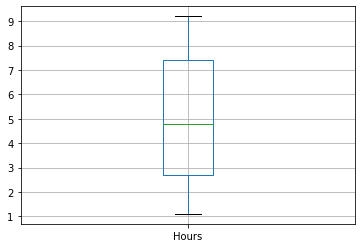

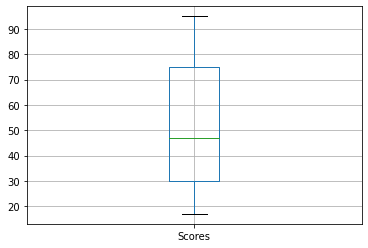

In [8]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

It can be seen from the above boxplot that the data **does not contain any outliers**

##### Using Seaborn library to get a little more information 

<AxesSubplot:xlabel='Hours', ylabel='Density'>

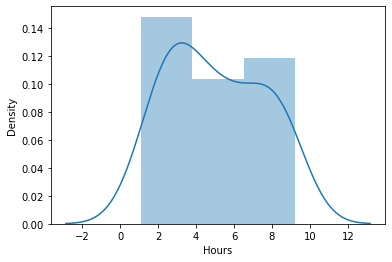

In [9]:
sns.distplot(data["Hours"])

#### Prelimnary Visualization
Let's plot our data points on 2-D graph to understand our data and see if we can find any relationship between the data.

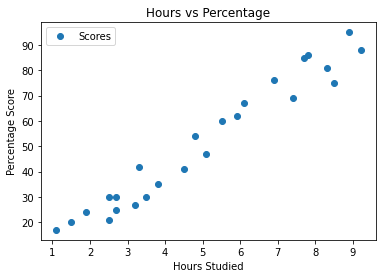

In [10]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

#### Preparing the data to build the model

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

#### Using Scikit-Learn's built-in train_test_split() method, 

We split the data into the trains and test sets.

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

#### Let's look at our train and test set.

In [13]:
print (X_train,Y_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [14]:
print (X_test, Y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [20 27 69 30 62]


#### Training the Model 

In [15]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, Y_train) 

print(lr.intercept_)
print(lr.coef_)

2.018160041434662
[9.91065648]


#### Plotting the regression line

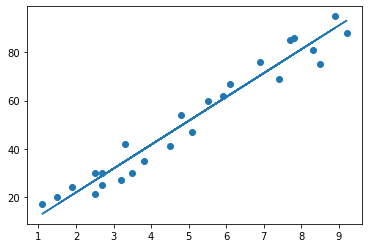

In [16]:
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

#### Predicting the data 

In [17]:
print(X_test) # Testing data - In Hours
Y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual vs Predicted

In [18]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### Graphically explaining the comparision between actual vs predicted values

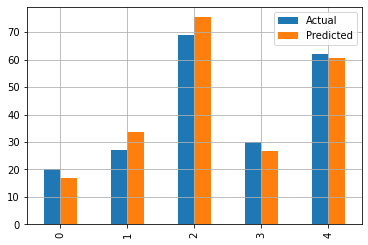

In [19]:
df.plot (kind = 'bar')
plt.grid(True)

#### Prediction if number of hours=9.25

In [20]:
Hours = 9.25
op = lr.predict([[Hours]])
print("No of Hours = ", Hours)
print("Predicted Score = ", op)

No of Hours =  9.25
Predicted Score =  [93.69173249]


##### *It is understood that if a student studies 9.25 hours his predicted score will be 93.69%*

#### Evaluating the performance of the Model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Square Error:', 
      metrics.mean_squared_error(Y_test, Y_pred))
print('R-Square:', 
      metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error: 4.183859899002982
Root Mean Square Error: 21.598769307217456
R-Square: 0.9454906892105354


### **THANK YOU**